In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
import math
import random
from matplotlib.patches import FancyArrowPatch
from matplotlib import patheffects as pe

In [20]:
backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')
backend_assetrelationship = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationship.csv', delimiter=',')
backend_assetrelationshipservice = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationshipservice.csv', delimiter=',')
backend_assettype = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assettype.csv', delimiter=',')

/var/folders/w6/y_7zdy0j1r1b354yw7wj0vgc0000gn/T/ipykernel_19385/3425762865.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')


In [21]:
# Categorize assets in backend_assets
asset_merged = backend_asset.merge(
    backend_assettype[['id', 'category']],
    left_on='asset_type_id',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
asset_merged['category'] = asset_merged['category'].fillna('Uncategorized')
asset_merged

,id,name,hostname,ipaddress,active,date_created,date_updated,assigned_value,asset_type_id,location_id,mac_address,estimated_value,computed_value,vlan_ids,last_reported,parent_asset_id,processing_state,id_type,category
0,93c84f4c-e251-443e-aedb-0f6d08fbbbb0,NaN,ec2-3-230-209-14.compute-1.amazonaws.com.,192.168.102.11/24,True,2024-10-31 12:17:34.266569 +00:00,2025-03-10 10:11:19.677025 +00:00,0,656c360c-f7e0-4026-b421-771f273958d2,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,b6:b9:76:54:2d:f6,430,430,{2102},2025-02-02 11:20:48.000000 +00:00,0c9d1848-0ee1-4641-a7da-2a7313c45b74,PROCESSED,656c360c-f7e0-4026-b421-771f273958d2,Other
1,1c3225eb-bd10-4065-8528-f8d5f42cff5b,NaN,NaN,192.168.45.15/24,True,2024-11-21 21:51:25.292424 +00:00,2025-03-10 10:11:19.128591 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{2102},2025-02-09 01:35:20.000000 +00:00,1fe7e185-f0fb-44bc-a41f-9a357e3ff77f,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
2,3e5887e1-9b95-4884-91a2-e67ec01d83ba,NaN,NaN,192.168.101.138/24,True,2025-01-11 11:57:55.251735 +00:00,2025-03-10 10:11:19.430381 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{120},2025-02-15 20:04:00.000000 +00:00,926411cd-ed42-44e4-ab52-c8edea870c45,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
3,cbc95c38-42fe-473a-bcdb-63869fb7f7d5,NaN,NaN,192.168.0.139,True,2024-12-16 20:09:26.114348 +00:00,2025-03-10 10:11:20.169085 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{2101},2025-01-20 05:04:13.000000 +00:00,NaN,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
4,dc032904-bec1-4296-8f84-c06a48fbbe28,NaN,DTNBATELIER.sasyb.local.,192.168.103.136/24,True,2025-01-09 14:56:37.313210 +00:00,2025-03-10 10:11:18.436401 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,10,10,{120},2025-02-06 15:26:47.000000 +00:00,a4c6b641-dcf8-4a1f-a4c6-4b68aac086b8,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,f5efb9ff-9a7c-41de-a527-8fbd8e127f23,NaN,NaN,192.168.103.105/24,True,2024-10-10 16:22:11.263672 +00:00,2025-03-10 10:11:20.105424 +00:00,0,c8746580-1199-41c3-a659-4870b6d265c9,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,f8:0d:60:9a:18:10,1,1,{2103},2025-02-15 18:06:05.000000 +00:00,NaN,PROCESSED,c8746580-1199-41c3-a659-4870b6d265c9,OT
119121,864c7d2e-6fbb-41e7-a140-b23c4636d789,NaN,NaN,10.61.242.238,True,2024-12-01 10:25:11.245691 +00:00,2025-03-10 10:11:21.103917 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{2102},2025-02-10 22:40:08.000000 +00:00,NaN,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
119122,8bba5974-b250-4b2c-8ba4-53e6b96cfecb,NaN,NaN,192.168.1.28,True,2024-11-03 14:32:44.207812 +00:00,2025-03-10 10:11:20.760451 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{45},2025-01-25 23:46:18.000000 +00:00,NaN,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
119123,a655da44-5ea3-45f8-838b-b55d65a3197d,NaN,NaN,192.168.36.17,True,2024-11-19 14:31:29.848713 +00:00,2025-03-10 10:11:18.638834 +00:00,0,962a2cc4-e7d2-4fd8-bd43-65a1a07a9049,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,f0:4a:02:65:d8:d4,0,0,{1001},2025-01-20 12:27:14.000000 +00:00,NaN,PROCESSED,962a2cc4-e7d2-4fd8-bd43-65a1a07a9049,Network


**VLAN120**

In [22]:
vlan_120 = asset_merged[asset_merged['vlan_ids'] == '{120}']

In [23]:
min_value = vlan_120['computed_value'].min()
max_value = vlan_120['computed_value'].max()
mean_value = vlan_120['computed_value'].mean()


print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {mean_value}")

Minimum: 0
Maximum: 232841
Average: 20.817939879353172


In [27]:
vlan_120_relationships = backend_assetrelationship[
    (backend_assetrelationship['source_asset_id'].isin(vlan_120['id'])) |
    (backend_assetrelationship['target_asset_id'].isin(vlan_120['id']))
]

print("Relationships in VLAN 120:")
vlan_120_relationships.head()

Relationships in VLAN 120:


,id,tags,date_created,date_updated,source_asset_id,target_asset_id
1,0efa852d-163d-4e30-bb84-3d3c3a63eff2,NaN,2024-10-09 20:51:56.709761 +00:00,2024-10-09 20:51:56.709817 +00:00,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,91d56263-ea09-4b3b-b128-49b23a86a0a3
7,ee182015-9fc4-43dc-b308-1000de7d27e8,NaN,2024-10-09 20:53:34.546818 +00:00,2024-10-09 20:53:34.546840 +00:00,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,070af283-f32d-4fc9-807e-80176d2a7537
14,fa9b76d5-4481-4a33-8b07-85a2b6bfd6a6,NaN,2024-10-09 20:56:48.290612 +00:00,2024-10-09 20:56:48.290627 +00:00,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,fd90a87e-7b7e-426b-b367-7a119360b8a1
19,185e7bb6-962d-4a2a-ab46-45cf63191993,NaN,2024-10-09 20:58:28.410405 +00:00,2024-10-09 20:58:28.410425 +00:00,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,149281ac-97c9-4a99-abec-80606893c09a
22,241d48c7-df57-4e22-a39f-f41b526a38bb,NaN,2024-10-09 20:59:47.409600 +00:00,2024-10-09 20:59:47.409616 +00:00,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,382b4a74-e1c4-42af-bdee-b7f8b49a03a3


In [29]:
service_120 = backend_assetrelationshipservice[
    backend_assetrelationshipservice['relationship_id'].isin(vlan_120_relationships['id'])]
service_120.head()

,id,source_port,target_port,protocol,date_created,date_updated,relationship_id,source_component_id,target_component_id,count,bytes
4,4dc2f655-5d2d-4b6d-b9bc-038e245edb1c,40266,10050,TCP,2024-10-10 14:56:19.089385 +00:00,2024-10-10 14:56:19.089403 +00:00,f70f9f5a-858a-4758-b23d-19a112a2c827,1c400022-0b8c-4f96-be98-c3fcf97f58ea,b009ff76-cea1-4281-8564-f477f43d4d4c,1,78
11,9a5dd14d-88a9-40af-ac44-566656ba5162,47664,10050,TCP,2024-10-10 15:50:19.015341 +00:00,2024-10-10 15:50:19.015357 +00:00,ecdb54ba-7988-4523-9f6a-6fc799a342f9,e5b97f15-47bf-41f5-a2ee-a7ba0dbaf670,3a9dbb7e-5c5c-4402-a60e-7352a02cb0ef,5,371
13,54e73c8e-8e7f-489d-877a-bdbc495b5c69,10050,33908,TCP,2024-10-10 19:03:41.133970 +00:00,2024-10-10 19:03:41.133986 +00:00,1d096692-62d5-428e-9eb1-71af994ab236,3a9dbb7e-5c5c-4402-a60e-7352a02cb0ef,06ca6c8d-d5a2-4d37-b360-03ab8c6d2b8d,16,1096
25,defd6c1e-1bf1-444e-949b-8e80abdf24b0,41806,10050,TCP,2024-10-10 15:05:18.351419 +00:00,2024-10-10 15:05:18.351444 +00:00,ecdb54ba-7988-4523-9f6a-6fc799a342f9,fa6392a9-af88-4f84-87b4-25d072950b9e,3a9dbb7e-5c5c-4402-a60e-7352a02cb0ef,4,290
28,e0c6a6da-5a7e-4e1a-9121-e23cd7f3d73f,40792,10050,TCP,2024-10-10 15:05:47.637766 +00:00,2024-10-10 15:05:47.637789 +00:00,2d8d1208-8368-4a16-8abc-c07b359e5aa1,b7b57403-a864-4223-89c4-122c31b7e736,4209a7b5-7cfc-42f0-a91e-f6d9820aba93,20,1695


In [30]:
service_120 = service_120.merge(
    vlan_120_relationships[['id','source_asset_id','target_asset_id']],
    how='left',
    left_on='relationship_id',
    right_on='id'
).drop(columns=['id_x', 'source_component_id', 'target_component_id', 'date_created', 'date_updated'])  

service_120.head()

,source_port,target_port,protocol,relationship_id,count,bytes,id_y,source_asset_id,target_asset_id
0,40266,10050,TCP,f70f9f5a-858a-4758-b23d-19a112a2c827,1,78,f70f9f5a-858a-4758-b23d-19a112a2c827,c937fafc-ea45-4f7b-9210-fd81a0faa687,c70a0cf1-2390-49db-b090-b9ab9695ec4b
1,47664,10050,TCP,ecdb54ba-7988-4523-9f6a-6fc799a342f9,5,371,ecdb54ba-7988-4523-9f6a-6fc799a342f9,c937fafc-ea45-4f7b-9210-fd81a0faa687,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2
2,10050,33908,TCP,1d096692-62d5-428e-9eb1-71af994ab236,16,1096,1d096692-62d5-428e-9eb1-71af994ab236,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,c937fafc-ea45-4f7b-9210-fd81a0faa687
3,41806,10050,TCP,ecdb54ba-7988-4523-9f6a-6fc799a342f9,4,290,ecdb54ba-7988-4523-9f6a-6fc799a342f9,c937fafc-ea45-4f7b-9210-fd81a0faa687,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2
4,40792,10050,TCP,2d8d1208-8368-4a16-8abc-c07b359e5aa1,20,1695,2d8d1208-8368-4a16-8abc-c07b359e5aa1,c937fafc-ea45-4f7b-9210-fd81a0faa687,84155a99-8a25-4d6d-90d3-09a03caf692f


**Transforming "count" and "bytes" data**

- The logarithm of 0 is undefined (log(0) → -∞), which will cause an error or NaN in plots/calculations
- Adding 1 ensures all values are ≥1: log(0 + 1) = log(1) = 0

In [31]:
service_120[['bytes', 'count']].describe().style.format({"bytes": "{:.2f}", "count": "{:.2f}"})

,bytes,count
count,130535.00,130535.00
mean,556623.73,751.20
std,67002180.87,50177.13
min,0.00,0.00
25%,78.00,1.00
50%,373.00,5.00
75%,789.00,10.00
max,17509286180.00,11557363.00


In [32]:
max_count = service_120['count'].max() or 1
max_bytes = service_120['bytes'].max() or 1

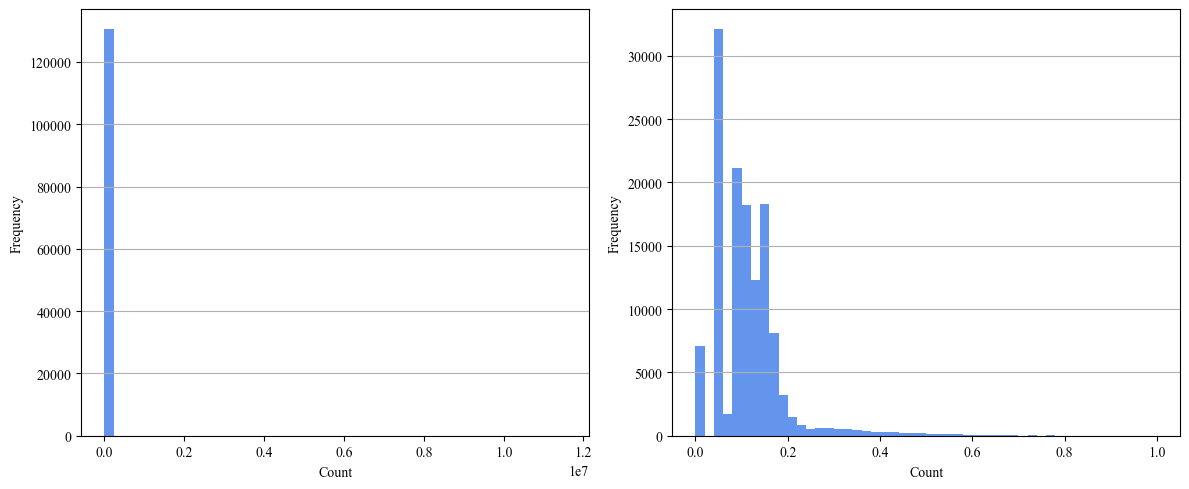

In [33]:
service_120['lin_score_c'] = service_120['count']
service_120['log_score_c'] = (np.log1p(service_120['count']) - service_120['count'].min()) / (np.log1p(max_count) - service_120['count'].min())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear score histogram
axes[0].hist(service_120['lin_score_c'], bins=50, color='cornflowerblue')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')  

# Log score histogram
axes[1].hist(service_120['log_score_c'], bins=50, color='cornflowerblue')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')  

plt.tight_layout()
plt.show()

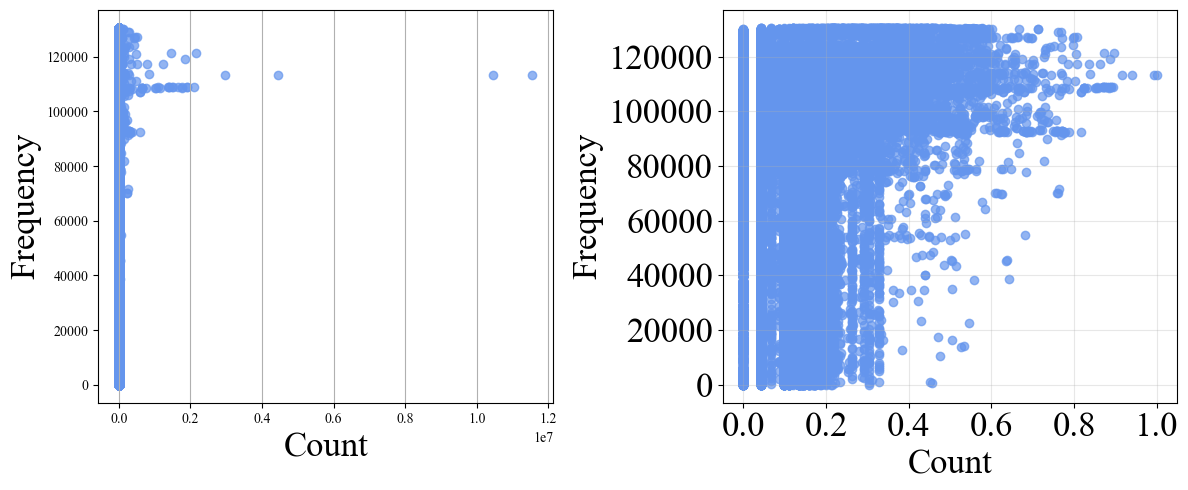

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(service_120['lin_score_c'], service_120.index, alpha=0.7, color='cornflowerblue')
axes[0].set_xlabel('Count', fontsize=25)
axes[0].set_ylabel('Frequency', fontsize=25)
axes[0].grid(axis='x')

axes[1].scatter(service_120['log_score_c'], service_120.index, alpha=0.7, color='cornflowerblue')
axes[1].set_xlabel('Count', fontsize=25)
axes[1].set_ylabel('Frequency', fontsize=25)
axes[1].grid(axis='x')

plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.tight_layout()
plt.show()

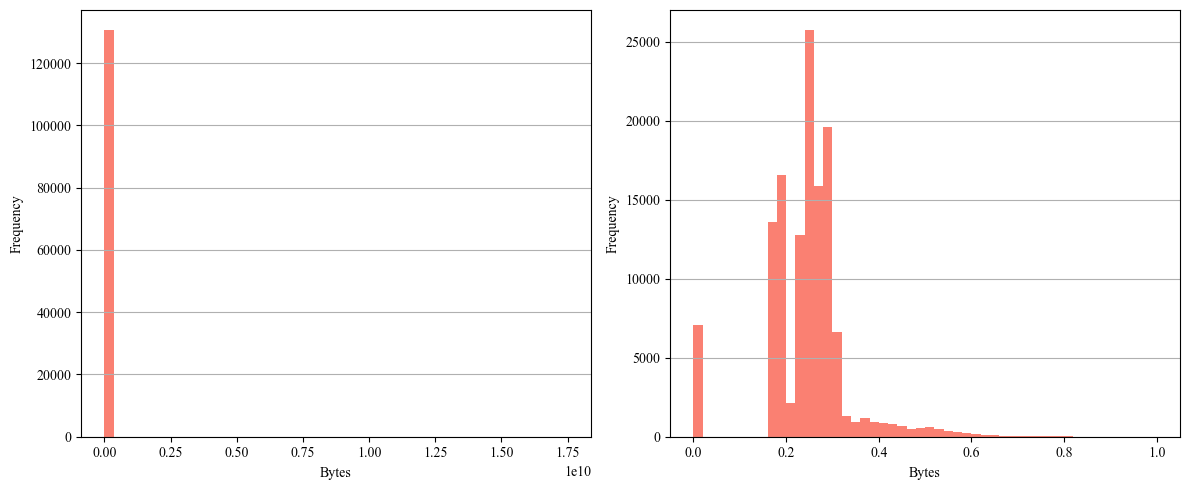

In [37]:
service_120['lin_score_b'] = service_120['bytes']
service_120['log_score_b'] = (np.log1p(service_120['bytes']) - service_120['bytes'].min()) / (np.log1p(max_bytes) - service_120['bytes'].min())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear score histogram
axes[0].hist(service_120['lin_score_b'], bins=50, color='salmon')
axes[0].set_xlabel('Bytes')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')  

# Log score histogram
axes[1].hist(service_120['log_score_b'], bins=50, color='salmon')
axes[1].set_xlabel('Bytes')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')  

plt.tight_layout()
plt.show()

# **Directed graph**

In [38]:
G_120 = nx.DiGraph()

for _, row in service_120.iterrows():
    source = row['source_asset_id']
    target = row['target_asset_id']
    count = row['count']
    bytes_transferred = row['bytes']
    
    G_120.add_edge(
        source,
        target,
        count=count,
        bytes=bytes_transferred,
        relationship_id=row['relationship_id']
    )


In [40]:
print("Number of nodes:", G_120.number_of_nodes())
print("Number of edges:", G_120.number_of_edges())

Number of nodes: 18529
Number of edges: 29508


In [41]:
edge_data_120 = [
    {
        'source': u,
        'target': v,
        'count': data.get('count', 0),
        'bytes': data.get('bytes', 0),
        'relationship_id': data.get('relationship_id', None)
    }
    for u, v, data in G_120.edges(data=True)
]
edges_120 = pd.DataFrame(edge_data_120)
edges_120.head(5)

,source,target,count,bytes,relationship_id
0,c937fafc-ea45-4f7b-9210-fd81a0faa687,c70a0cf1-2390-49db-b090-b9ab9695ec4b,1383012,107593666,f70f9f5a-858a-4758-b23d-19a112a2c827
1,c937fafc-ea45-4f7b-9210-fd81a0faa687,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,1762620,132927575,ecdb54ba-7988-4523-9f6a-6fc799a342f9
2,c937fafc-ea45-4f7b-9210-fd81a0faa687,84155a99-8a25-4d6d-90d3-09a03caf692f,1901051,156041775,2d8d1208-8368-4a16-8abc-c07b359e5aa1
3,c937fafc-ea45-4f7b-9210-fd81a0faa687,b7cbce4c-b9e9-45cb-a028-10accaebb9e6,2086589,157564720,04bca2e2-eb0c-4a80-a0f4-1de38e86a152
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,1891169,154038803,db15984b-f733-4b24-a896-6760d4ca4edd


In [42]:
edges_120 = edges_120.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='source',
    right_on='id'
).drop(columns=['id'])

edges_120 = edges_120.merge(
    asset_merged[['id', 'category']],  
    how='left',
    left_on='target',  
    right_on='id'
).drop(columns=['id']) 

edges_120 = edges_120.rename(columns={
    'category_x': 'source_type',  
    'category_y': 'target_type'   
})

edges_120.head(5)

,source,target,count,bytes,relationship_id,source_type,target_type
0,c937fafc-ea45-4f7b-9210-fd81a0faa687,c70a0cf1-2390-49db-b090-b9ab9695ec4b,1383012,107593666,f70f9f5a-858a-4758-b23d-19a112a2c827,IT,IT
1,c937fafc-ea45-4f7b-9210-fd81a0faa687,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,1762620,132927575,ecdb54ba-7988-4523-9f6a-6fc799a342f9,IT,IT
2,c937fafc-ea45-4f7b-9210-fd81a0faa687,84155a99-8a25-4d6d-90d3-09a03caf692f,1901051,156041775,2d8d1208-8368-4a16-8abc-c07b359e5aa1,IT,IT
3,c937fafc-ea45-4f7b-9210-fd81a0faa687,b7cbce4c-b9e9-45cb-a028-10accaebb9e6,2086589,157564720,04bca2e2-eb0c-4a80-a0f4-1de38e86a152,IT,IT
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,1891169,154038803,db15984b-f733-4b24-a896-6760d4ca4edd,IT,IT


Indegree and Outdegree based on category

In [44]:
indegree_120 = dict(G_120.in_degree())
outdegree_120 = dict(G_120.out_degree())

nodes_120 = pd.DataFrame({
    'node': list(G_120.nodes()),
    'in_degree': [indegree_120.get(node, 0) for node in G_120.nodes()],
    'out_degree': [outdegree_120.get(node, 0) for node in G_120.nodes()]
})
nodes_120['degree_total'] = nodes_120['in_degree'] + nodes_120['out_degree']

nodes_120 = nodes_120.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='node',
    right_on='id'
).drop(columns=['id'])

nodes_120.sort_values(by=['in_degree', 'out_degree'], ascending=False)

,node,in_degree,out_degree,degree_total,category
7,a807012c-4456-4764-8e5a-4f52610429d5,3870,16966,20836,IT
1,c70a0cf1-2390-49db-b090-b9ab9695ec4b,507,513,1020,IT
5,a3f0e6fd-76c1-49ef-88bc-0b62bd36be2f,422,489,911,IT
2,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,339,342,681,IT
4,b7cbce4c-b9e9-45cb-a028-10accaebb9e6,326,329,655,IT
...,...,...,...,...,...
18360,f8787073-ca3e-4036-9d28-0d2815e6d8e2,0,1,1,Network
18454,18ad5c0e-ffa0-490c-817c-6a47ba8d95e8,0,1,1,Other
18459,2ced8261-ed44-41a2-bb48-ea974760a691,0,1,1,IT
18519,3a170cf2-e15a-4b86-b5cf-f06bd1fdb81e,0,1,1,Other


In [45]:
avg_deg_by_type = (
    nodes_120
      .groupby('category')[['in_degree','out_degree', 'degree_total']]
      .mean()
      .rename(columns={
          'in_degree':  'avg_in_degree',
          'out_degree': 'avg_out_degree',
          'degree_total':  'avg_total_degree'
      })
)
avg_deg_by_type.sort_values(by='avg_total_degree', ascending = False).round(2)

,avg_in_degree,avg_out_degree,avg_total_degree
category,,,
IT,52.73,146.89,199.62
IoT,44.00,44.00,88.00
Other,4.08,3.92,8.00
OT,1.39,1.43,2.83
Network,1.31,0.55,1.86
Uncategorized,1.04,0.30,1.34


# **External-attack probability p_j**

**Connectivity risk**

In [46]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_120)
# Calculate betweennss centrality
betweenness_centrality = nx.betweenness_centrality(G_120)
# Calculate betweennss centrality
closeness_centrality = nx.closeness_centrality(G_120)

In [47]:
nodes_120['degree_centrality'] = nodes_120['node'].map(degree_centrality)
nodes_120['betweenness_centrality'] = nodes_120['node'].map(betweenness_centrality)
nodes_120['closeness_centrality'] = nodes_120['node'].map(closeness_centrality)
alpha, beta, delta = 0.4, 0.4, 0.2

nodes_120['connectivity_risk'] = (
    alpha * nodes_120['degree_centrality'] +
    beta  * nodes_120['betweenness_centrality'] +
    delta * nodes_120['closeness_centrality']
)

#Min–max normalize connectivity_risk to [0,1]
cr_min = nodes_120['connectivity_risk'].min()
cr_max = nodes_120['connectivity_risk'].max()
nodes_120['connectivity_risk'] = (
    (nodes_120['connectivity_risk'] - cr_min) /
    (cr_max - cr_min)
).fillna(0)

nodes_120[['node','degree_centrality','betweenness_centrality','closeness_centrality','connectivity_risk']].sort_values(ascending=False, by='connectivity_risk')

,node,degree_centrality,betweenness_centrality,closeness_centrality,connectivity_risk
7,a807012c-4456-4764-8e5a-4f52610429d5,1.124568,0.272974,0.183329,1.000000
1,c70a0cf1-2390-49db-b090-b9ab9695ec4b,0.055052,0.017435,0.100930,0.082529
5,a3f0e6fd-76c1-49ef-88bc-0b62bd36be2f,0.049169,0.015903,0.099760,0.077157
11,5c8f1841-3092-4317-a563-70cf9b3a7af1,0.001403,0.029890,0.138259,0.067400
2,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,0.036755,0.005272,0.098643,0.061307
...,...,...,...,...,...
1406,b88b22a6-7407-4ab2-b73e-0649f577c70c,0.000054,0.000000,0.000000,0.000000
1386,eba9282d-1da4-4c4c-aecf-57c71f9e6cde,0.000054,0.000000,0.000000,0.000000
18068,5ca375ac-0120-4109-9310-31b13adc0974,0.000054,0.000000,0.000000,0.000000
1332,9f114a0d-bac2-4f24-86a0-786ff753f516,0.000054,0.000000,0.000000,0.000000


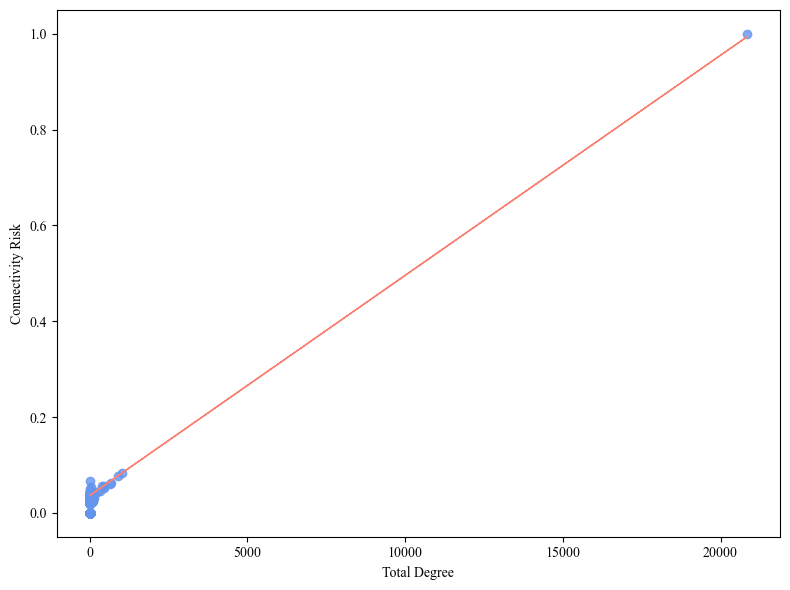

In [49]:
# Plot
x = nodes_120['degree_total']
y = nodes_120['connectivity_risk']

slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(nodes_120['degree_total'], nodes_120['connectivity_risk'], alpha=0.8, color='cornflowerblue')
plt.plot(x, line, color='salmon', linewidth=1, label='Fitted Line')
plt.xlabel('Total Degree')
plt.ylabel('Connectivity Risk')
plt.tight_layout()
plt.show()

In [50]:
nodes_120.groupby('category')[['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'connectivity_risk']].mean().sort_values(by='connectivity_risk', ascending=False)

,degree_centrality,betweenness_centrality,closeness_centrality,connectivity_risk
category,,,,
Uncategorized,0.000072,2.782567e-07,0.109181,0.036671
Network,0.000100,6.612001e-06,0.106351,0.035744
IoT,0.004750,3.728000e-04,0.094807,0.035236
IT,0.010774,2.676203e-03,0.064482,0.030646
OT,0.000153,7.023808e-09,0.070623,0.023779
Other,0.000432,1.031059e-05,0.055714,0.018967


**Asset based risk**

In [51]:
# Compute mean connectivity risk per category
mean_risk = (
    nodes_120
    .groupby('category')['connectivity_risk']
    .mean()
)

# Sort categories by average risk (ascending)
sorted_cats = mean_risk.sort_values(ascending=False).index.tolist()

# OT on top of the list (always highest baseline)
if 'OT' in sorted_cats:
    sorted_cats.remove('OT')
sorted_cats = ['OT'] + sorted_cats  # OT always first

# Assign base values from 0.08 to 0.02
base_max = 0.08
base_min = 0.02
n = len(sorted_cats)
step = (base_max - base_min) / (n - 1) if n > 1 else 0

category_base = {
    cat: base_max - i * step
    for i, cat in enumerate(sorted_cats)
}


In [53]:
category_base

{'OT': 0.08,
 'Uncategorized': 0.068,
 'Network': 0.056,
 'IoT': 0.044,
 'IT': 0.032,
 'Other': 0.020000000000000004}

In [55]:
df_pj = nodes_120.copy()

df_pj['cat_mean_risk'] = df_pj['category'].map(mean_risk)
df_pj['base_c'] = df_pj['category'].map(category_base)

df_pj['p_j'] = df_pj.apply(
    
    lambda row: min(1.0, row['base_c'] * (row['connectivity_risk'] / row['cat_mean_risk']))
    if row['cat_mean_risk'] > 0 else row['base_c'],
    axis=1
)

p_j = df_pj[['node', 'connectivity_risk', 'cat_mean_risk', 'base_c', 'p_j']]
p_j.head()

,node,connectivity_risk,cat_mean_risk,base_c,p_j
0,c937fafc-ea45-4f7b-9210-fd81a0faa687,0.026591,0.030646,0.032,0.027766
1,c70a0cf1-2390-49db-b090-b9ab9695ec4b,0.082529,0.030646,0.032,0.086174
2,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,0.061307,0.030646,0.032,0.064015
3,84155a99-8a25-4d6d-90d3-09a03caf692f,0.046461,0.030646,0.032,0.048513
4,b7cbce4c-b9e9-45cb-a028-10accaebb9e6,0.060088,0.030646,0.032,0.062742


In [57]:
p_j_category = p_j.merge(
    asset_merged[['id', 'category']],
    left_on='node',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
p_j_category['category'] = p_j_category['category'].fillna('Uncategorized')
p_j_category.sort_values(by='p_j', ascending=False).head(5)

,node,connectivity_risk,cat_mean_risk,base_c,p_j,id,category
7,a807012c-4456-4764-8e5a-4f52610429d5,1.000000,0.030646,0.032,1.000000,a807012c-4456-4764-8e5a-4f52610429d5,IT
1,c70a0cf1-2390-49db-b090-b9ab9695ec4b,0.082529,0.030646,0.032,0.086174,c70a0cf1-2390-49db-b090-b9ab9695ec4b,IT
9,10f324c8-b31b-44d0-bbd9-0cd74b2618b9,0.053748,0.035744,0.056,0.084206,10f324c8-b31b-44d0-bbd9-0cd74b2618b9,Network
1037,fd90a87e-7b7e-426b-b367-7a119360b8a1,0.024223,0.023779,0.080,0.081496,fd90a87e-7b7e-426b-b367-7a119360b8a1,OT
1053,0d53519a-7594-437e-ba7c-baf6e8db0080,0.024223,0.023779,0.080,0.081496,0d53519a-7594-437e-ba7c-baf6e8db0080,OT


In [58]:
p_j_category.describe().style.format({
    "connectivity_risk": "{:.2f}",
    "cat_mean_risk": "{:.2f}",
    "p_j": "{:.2f}"
})

,connectivity_risk,cat_mean_risk,base_c,p_j
count,18529.00,18529.00,18529.000000,18529.00
mean,0.04,0.04,0.061613,0.06
std,0.01,0.00,0.006825,0.01
min,0.00,0.02,0.020000,0.00
25%,0.04,0.04,0.056000,0.06
50%,0.04,0.04,0.056000,0.06
75%,0.04,0.04,0.068000,0.07
max,1.00,0.04,0.080000,1.00


In [59]:
p_j_category.groupby('category').describe()

connectivity_risk                                          \
                          count      mean       std       min       25%   
category                                                                  
IT                        146.0  0.030646  0.081881  0.000000  0.020754   
IoT                         1.0  0.035236       NaN  0.035236  0.035236   
Network                  9293.0  0.035744  0.004518  0.000000  0.037262   
OT                         23.0  0.023779  0.001176  0.020639  0.024223   
Other                      38.0  0.018967  0.011406  0.000000  0.019970   
Uncategorized            9028.0  0.036671  0.003966  0.000000  0.037262   

                                            cat_mean_risk            ...  \
                    50%       75%       max         count      mean  ...   
category                                                             ...   
IT             0.021300  0.025973  1.000000         146.0  0.030646  ...   
IoT            0.035236  0.035236  0.035236           1.0  0.035236  ...   
Network        0.037262  0.037262  0.053748        9293.0  0.035744  ...   
OT             0.024223  0.024223  0.024223          23.0  0.023779  ...   
Other          0.020215  0.020975  0.044740          38.0  0.018967  ...   
Uncategorized  0.037262  0.037262  0.037636        9028.0  0.036671  ...   

              base_c            p_j                                          \
                 75%    max   count      mean       std       min       25%   
category                                                                      
IT             0.032  0.032   146.0  0.031697  0.081894  0.000000  0.021671   
IoT            0.044  0.044     1.0  0.044000       NaN  0.044000  0.044000   
Network        0.056  0.056  9293.0  0.056000  0.007079  0.000000  0.058378   
OT             0.080  0.080    23.0  0.080000  0.003957  0.069437  0.081496   
Other          0.020  0.020    38.0  0.020000  0.012027  0.000000  0.021058   
Uncategorized  0.068  0.068  9028.0  0.068000  0.007354  0.000000  0.069095   

                                             
                    50%       75%       max  
category                                     
IT             0.022241  0.027120  1.000000  
IoT            0.044000  0.044000  0.044000  
Network        0.058378  0.058378  0.084206  
OT             0.081496  0.081496  0.081496  
Other          0.021315  0.022118  0.047177  
Uncategorized  0.069095  0.069095  0.069788  

[6 rows x 32 columns]

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

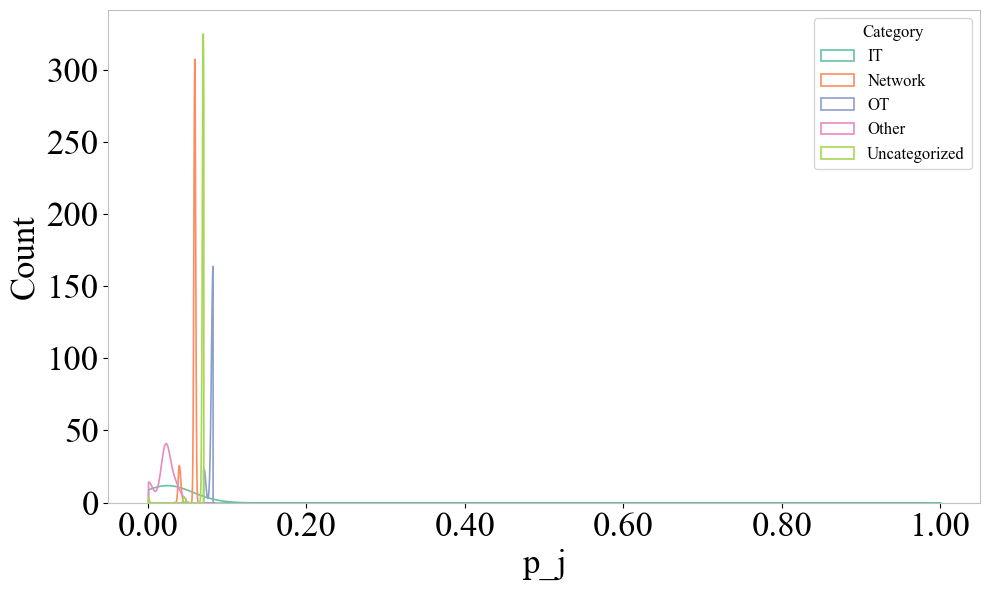

<Figure size 640x480 with 0 Axes>

In [61]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Setup
categories = p_j_category['category'].unique()
palette = dict(zip(categories, sns.color_palette("Set2", len(categories))))

plt.figure(figsize=(10, 6))

# Plot KDE for each category
for cat in categories:
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0,
        linewidth=1.2,
        color=palette[cat],
        clip=(0, 1),
        cut=0,
        bw_adjust=1
    )

# Labels and styling
plt.xlabel("p_j", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.legend(title="Category", fontsize=12, title_fontsize=12)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='-', alpha=0.01)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("silver")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

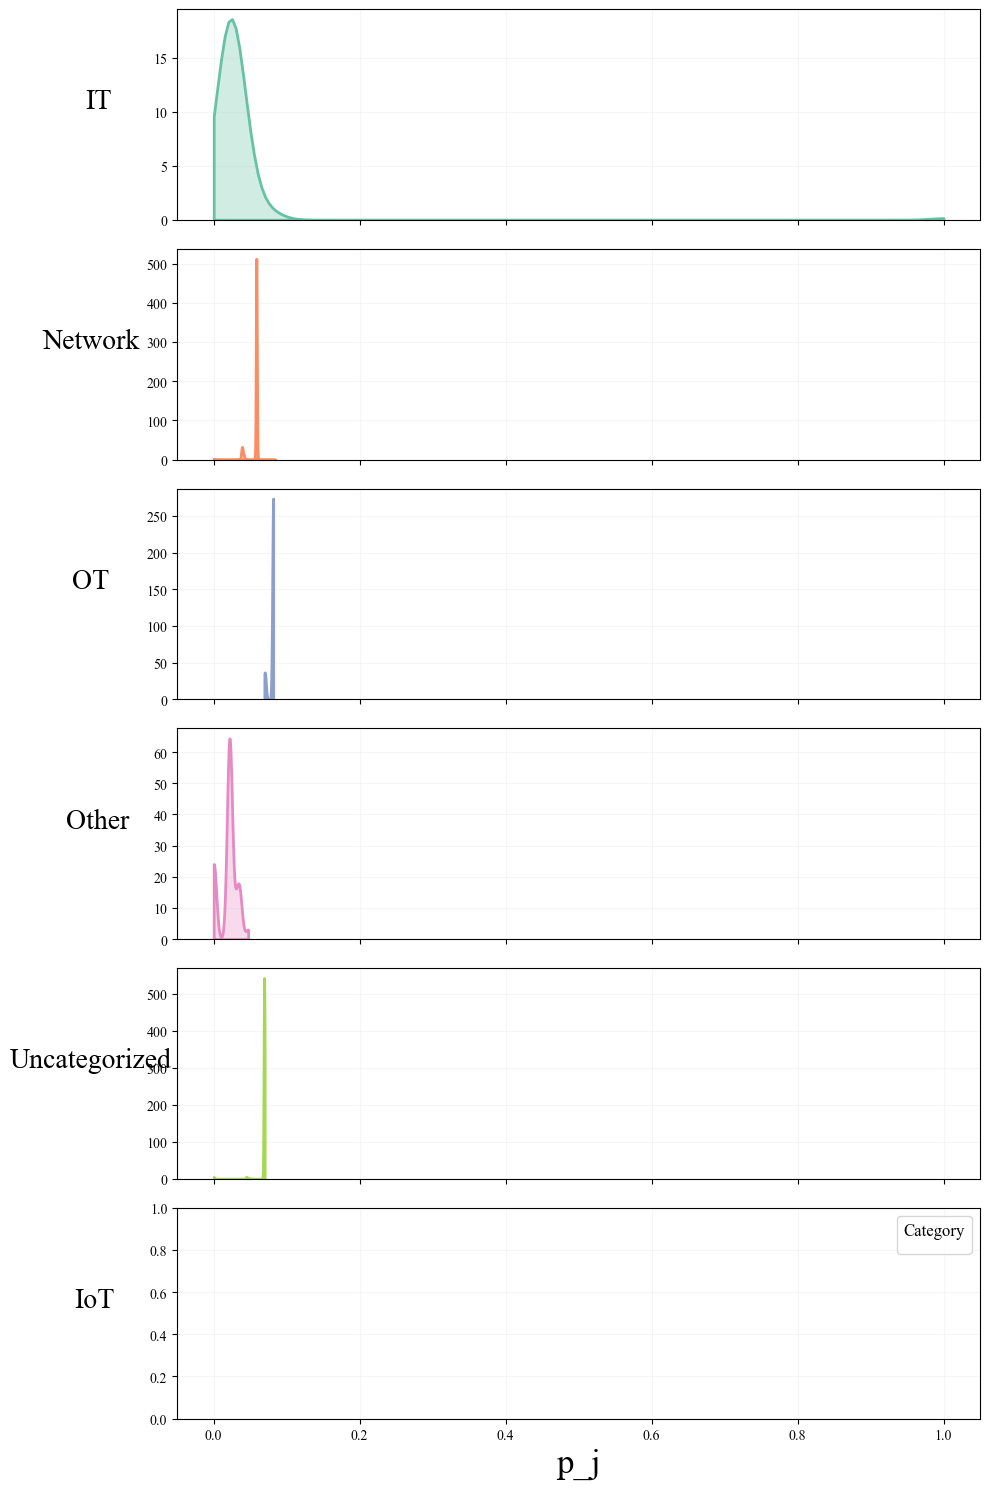

In [62]:
cats = p_j_category['category'].unique()
palette = dict(zip(cats, sns.color_palette("Set2", len(cats))))

fig, axes = plt.subplots(len(cats), 1, sharex=True, figsize=(10, 2.5*len(cats)))

for ax, cat in zip(axes, cats):
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0.3,
        linewidth=2,
        color=palette[cat],
        clip=(0,1),
        cut=0,
        bw_adjust=0.6,
        ax=ax
    )
    ax.set_ylabel(cat, rotation=0, labelpad=40, fontsize=20)
    ax.legend().remove()
    ax.grid(True, linestyle='-', alpha=0.1)

axes[-1].set_xlabel("p_j", fontsize=25)
axes[-1].legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


# **Internal-exploit probability p_ij**

Build edge metrics lookup, normalizing count & bytes to derive p_edge

In [64]:
import numpy as np

# Log-normalize 'count' and 'bytes' columns
max_count = edges_120['count'].max() or 1
max_bytes = edges_120['bytes'].max() or 1

edges_120['norm_cnt'] = np.log1p(edges_120['count']) / np.log1p(max_count)
edges_120['norm_byt'] = np.log1p(edges_120['bytes']) / np.log1p(max_bytes)

# Tunable parameters
p0 = 0.05                     # baseline risk
alpha_beta_sum = 0.95
alpha = (4 / 7) * alpha_beta_sum   # 4:3 ratio
beta = (3 / 7) * alpha_beta_sum

edges_120['p_ij'] = (
    p0
    + alpha * edges_120['norm_cnt']
    + beta  * edges_120['norm_byt']
).clip(upper=1.0)  # Ensure it's within [0,1]

p_ij = {
    (row.source, row.target): {
        'p_ij': row.p_ij,
        'count': row['count'],
        'bytes': row['bytes']
    }
    for _, row in edges_120.iterrows()
}

In [65]:
df_p_ij = pd.DataFrame([
    {
        'source': src,
        'target': tgt,
        'p_ij': vals['p_ij'],
        'count':  vals.get('count', 0),
        'bytes':  vals.get('bytes', 0),
    }
    for (src, tgt), vals in p_ij.items()
])

df_p_ij

,source,target,p_ij,count,bytes
0,c937fafc-ea45-4f7b-9210-fd81a0faa687,c70a0cf1-2390-49db-b090-b9ab9695ec4b,0.841231,1383012,107593666
1,c937fafc-ea45-4f7b-9210-fd81a0faa687,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,0.852977,1762620,132927575
2,c937fafc-ea45-4f7b-9210-fd81a0faa687,84155a99-8a25-4d6d-90d3-09a03caf692f,0.858268,1901051,156041775
3,c937fafc-ea45-4f7b-9210-fd81a0faa687,b7cbce4c-b9e9-45cb-a028-10accaebb9e6,0.861544,2086589,157564720
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,e128b3f2-796f-45b5-92f2-129c0dd8c8ff,0.857871,1891169,154038803
...,...,...,...,...,...
29503,7e686b30-e14b-4f39-88b0-04ef6ef9434d,b303cc72-91d6-480c-9089-b0284617ff2c,0.296685,30,2100
29504,7e686b30-e14b-4f39-88b0-04ef6ef9434d,48a75583-a009-43e5-a561-5dbdf3fc8f03,0.250974,9,1325
29505,7e686b30-e14b-4f39-88b0-04ef6ef9434d,7ec7111f-2bd7-43ff-b15d-8c86ef2ec55a,0.340387,54,8717
29506,01f7c812-9039-4850-b5dd-8eb82b2857c8,48a75583-a009-43e5-a561-5dbdf3fc8f03,0.264550,12,1752


In [67]:
edges_120.sort_values(by='p_ij', ascending=False).head(5)

,source,target,count,bytes,relationship_id,source_type,target_type,norm_cnt,norm_byt,p_ij
27365,9b0f856e-6f4c-4c46-a94a-023af7923deb,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,11557363,17509286180,9c4d52ab-8854-4415-bf05-f7c930323cb3,Network,IT,1.000000,1.000000,1.000000
27741,ad03ebaf-e7f8-4d44-906d-a0efebdc8f4c,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,10454962,15840556077,010df72c-ee1e-4e1e-b11a-f17dbafafb33,Network,IT,0.993836,0.995754,0.994925
28649,38d73fa4-2842-498b-aaca-bf026efa1fe1,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,1841988,2725246613,10ab2fea-e88b-41df-b8c0-ea483a47aa07,Network,IT,0.887075,0.921132,0.906588
757,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,9b0f856e-6f4c-4c46-a94a-023af7923deb,4433853,289869887,5396d720-0fcf-4a71-820e-ebd766bc3716,IT,Network,0.941089,0.826123,0.897227
756,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,ad03ebaf-e7f8-4d44-906d-a0efebdc8f4c,2957563,194527214,d0321972-97ae-4c62-a04b-d663293797ce,IT,Network,0.916192,0.809212,0.876826


High-risk edges

In [ ]:
# Filter for high-risk internal exploit edges
high_risk_edges = edges_120[edges_120['p_ij'] > 0.75]

# Find most common source and target
most_common_source = high_risk_edges['source'].value_counts().idxmax()
most_common_target = high_risk_edges['target'].value_counts().idxmax()

source_counts = high_risk_edges['source'].value_counts()
target_counts = high_risk_edges['target'].value_counts()

print("Most frequent source (p_ij > 0.75):", most_common_source)
print("Occurrences:", source_counts[most_common_source])
print("\nMost frequent target (p_ij > 0.75):", most_common_target)
print("Occurrences:", target_counts[most_common_target])


Most frequent source (p_ij > 0.75): e128b3f2-796f-45b5-92f2-129c0dd8c8ff
Occurrences: 28

Most frequent target (p_ij > 0.75): c70a0cf1-2390-49db-b090-b9ab9695ec4b
Occurrences: 7


In [79]:
high_risk_edges.shape

(88, 10)

In [80]:
total = len(high_risk_edges)

# Compute frequency of each category as source
source_counts = high_risk_edges['source_type'].value_counts(normalize=True) * 100

# Compute frequency of each category as target
target_counts = high_risk_edges['target_type'].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    'category': sorted(set(source_counts.index).union(target_counts.index)),
    'source (%)': [source_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))],
    'target (%)': [target_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))]
})

category_summary = category_summary.round(2)
category_summary.sort_values(by='source (%)', ascending=False)


,category,source (%),target (%)
0,IT,62.50,50.00
2,Network,35.23,29.55
1,IoT,2.27,1.14
3,OT,0.00,19.32


# **BAG** 

In [81]:
N = nodes_120['node'].tolist() #Node set N
T = {node: 'OR' for node in N} #Node types T: default to 'OR' for all nodes
and_nodes = []  
for node in and_nodes:
    if node in T:
        T[node] = 'AND'

E = list(p_ij.keys())

In [82]:
BAG = {
    'nodes': N,
    'types': T,
    'edges': E,
    'p_int': p_ij,
    'p_ext': p_j
}

Build parent lists

In [83]:
nodes = nodes_120['node'].tolist()

parents = {j: [] for j in nodes}
for (i, j), val in p_ij.items():
    parents[j].append((i, val['p_ij']))

Run fixed‐point propagation to solve for all P_j

In [84]:
def compute_marginals(p_ext_map, parents, clamp=None, max_iter=200, tol=1e-6):
    """
    Fixed‐point solve for P_j = P(X_j=1).
    If clamp is given as {node: value}, those P[node] stay fixed each iteration.
    """
    clamp = clamp or {}
    # 1) Initialize P_j = leak_j (or clamped value if provided)
    P = {
        j: (clamp[j] if j in clamp else p_ext_map.get(j, 0.01))
        for j in parents
    }

    for _ in range(max_iter):
        P_new = P.copy()
        for j, preds in parents.items():
            if j in clamp:
                # keep the clamped value
                P_new[j] = clamp[j]
                continue

            # start with no‐compromise = (1 − external leak)
            p_no = 1 - p_ext_map.get(j, 0.0)
            # fold in each parent's contribution
            for i, rho_ij in preds:
                p_no *= (1 - rho_ij * P[i])
            P_new[j] = 1 - p_no

        # check convergence
        delta = max(abs(P_new[j] - P[j]) for j in P)
        P = P_new
        if delta < tol:
            break

    return P


In [100]:
parents = { j: [] for j in BAG['nodes'] }
for (i, j), val in BAG['p_int'].items():
    parents[j].append((i, val['p_ij']))

P_base = compute_marginals(BAG['p_ext'], parents)
P_base_df = pd.DataFrame.from_dict(P_base, orient='index', columns=['P_base'])
P_base_df.sort_values(by='P_base', ascending=False).head(30)


,P_base
9536e21d-1854-4cef-88a4-4b25a20fb254,1.0
77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,1.0
84155a99-8a25-4d6d-90d3-09a03caf692f,1.0
b7cbce4c-b9e9-45cb-a028-10accaebb9e6,1.0
a3f0e6fd-76c1-49ef-88bc-0b62bd36be2f,1.0
e128b3f2-796f-45b5-92f2-129c0dd8c8ff,1.0
a807012c-4456-4764-8e5a-4f52610429d5,1.0
c3b520fe-c479-4f60-9b73-cbba747f7b4b,1.0
c70a0cf1-2390-49db-b090-b9ab9695ec4b,1.0
a1e81a6c-a6f1-41da-9df3-9b0427db4802,1.0


In [ ]:
#P_base_df.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/P_base_120.csv', index=True)

In [252]:
P_base_1 = compute_marginals(p_j, parents)
P_base_df_1 = pd.DataFrame.from_dict(P_base_1, orient='index', columns=['P_base'])
P_base_df_1.sort_values(by='P_base', ascending=False).tail(30)

,P_base
327a4889-cd3a-43a9-8ff1-f345dcae6375,0.0
fb0dd047-316b-4ab3-88ec-5788d05f4e43,0.0
2f46520b-45f9-4345-adae-9f12eaa3c12b,0.0
d0b09984-2762-4182-9b7e-ac174f23639d,0.0
12f8e7e1-9330-4388-be30-5e3fb8ea7d8d,0.0
ce0b2e84-b6b5-4bcc-8eeb-7993c4c01954,0.0
32289d63-a58d-4e25-bf3a-41bffdb86723,0.0
c4232808-abd1-42a6-b1a7-e636b28e915f,0.0
7e768b8f-28bf-4589-a077-62e83a2b6f0d,0.0
6d30bec2-5e24-410e-86f1-d34e00d162ef,0.0


In [107]:
p_base_cat = P_base_df.merge(
    asset_merged[['id', 'category']],
    left_index=True,
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
p_base_cat.groupby(by='category')[['P_base']].mean().sort_values(by='P_base', ascending=False).round(2)

,P_base
category,
IoT,1.00
OT,0.75
IT,0.70
Other,0.46
Network,0.20
Uncategorized,0.16


Summary of output:
P_base: a dict of each node’s marginal compromise probability
- For asset j in steady‐state: the chance j is compromised at any given time if we let compromises flow through the network according to noisy‐OR equations.
- Treat P_base as the Annual Rate of Occurrence (ARO)


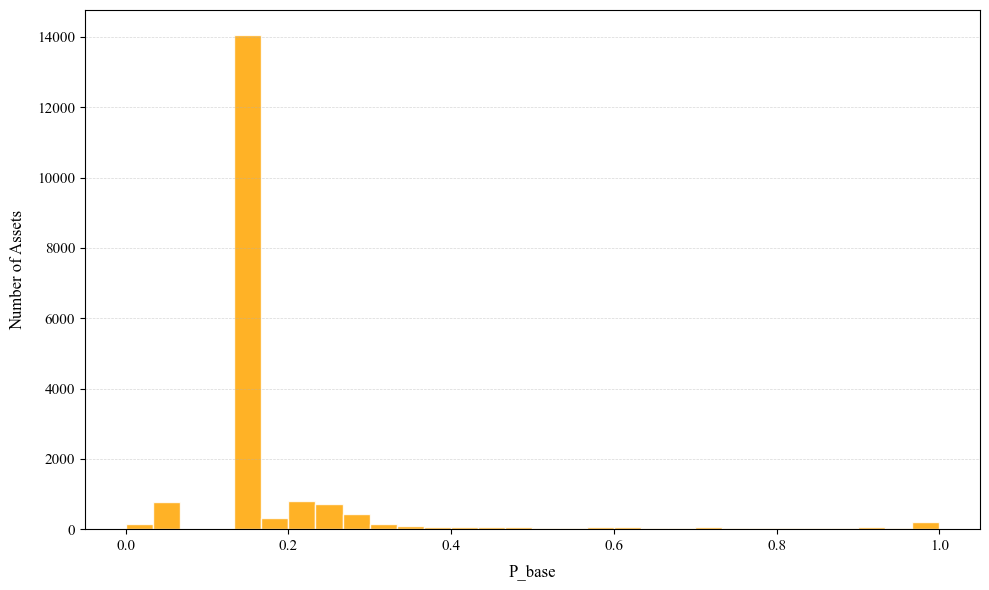

In [98]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    P_base_df['P_base'],
    bins=30,
    edgecolor='white',
    color='#FFA500',  
    alpha=0.85
)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel("P_base", fontsize=12, labelpad=8)
plt.ylabel("Number of Assets", fontsize=12, labelpad=8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


**Likelihood of a huge impact**

Monte Carlo sampling

In [45]:
import random

In [51]:
pruned_edges = (
    df_p_ij
      .sort_values(['target','p_ij'], ascending=[True, False])
      .groupby('target', as_index=False)
      .head(20)
      .reset_index(drop=True)
)

#Build directed graph and topological order
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(pruned_edges[['source','target']].values)
try:
    topo_order = list(nx.topological_sort(G))
except nx.NetworkXUnfeasible:
    topo_order = nodes  

def sample_cascade(seed_node, n_samples=500):
    counts = []
    for _ in range(n_samples):
        X = {seed_node: True}
        for node in topo_order:
            if node == seed_node:
                continue
            p_ext = p_j.get(node, 0.0)
            p_no = 1 - p_ext
            for parent in G.predecessors(node):
                if X.get(parent, False):
                    p_no *= (1 - p_ij[(parent, node)]['p_ij'])
            p_comp = 1 - p_no
            X[node] = (random.random() < p_comp)
        counts.append(sum(1 for n in nodes if n != seed_node and X.get(n, False)))
    return counts

#Monte Carlo for each node
n_samples = 5
results = []
for node in nodes:
    cascade = sample_cascade(node, n_samples=n_samples)
    results.append({
        'asset_id': node,
        'mean_cascade': np.mean(cascade),
        'p_any_cascade': np.mean([c > 0 for c in cascade])
    })

In [187]:
df_results = pd.DataFrame(results)
df_results.sort_values(by='mean_cascade', ascending=False)
#df_results.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/VLAN_120_results.csv', index=False)

,asset_id,mean_cascade,p_any_cascade
7,a807012c-4456-4764-8e5a-4f52610429d5,2691.6,1.0
6142,faea291e-2697-4323-9e1f-ad9248fa751b,2235.8,1.0
8418,c1986d53-edbf-4bfb-9321-3f7b14408afa,2187.2,0.8
1859,9b605f97-fcb2-4343-9b11-d2207d51c9a1,2178.8,0.8
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,2174.0,0.8
...,...,...,...
6327,e3fe4de9-1e28-4b93-9bfc-25635563a30f,0.0,0.0
6328,af5814a8-0b67-4882-84a1-bfd06b34eda1,0.0,0.0
6329,5c1e548e-68f5-45de-9c32-1dce3ddec824,0.0,0.0
6330,88f1100c-3d51-4bc3-9d14-eb99e36357d7,0.0,0.0


Summary of output
- P_any_cascade: probability that compromising j infects at least one other node.
- mean_cascade: average number of other assets that end up compromised across all simulations when we “seed” a compromise at j.


In [188]:
category_result = df_results.merge(
    asset_merged[['id', 'category']],
    left_on='asset_id',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
category_result['category'] = category_result['category'].fillna('Uncategorized')
category_result.sort_values(by='mean_cascade', ascending=False).head(5)

,asset_id,mean_cascade,p_any_cascade,id,category
7,a807012c-4456-4764-8e5a-4f52610429d5,2691.6,1.0,a807012c-4456-4764-8e5a-4f52610429d5,IT
6142,faea291e-2697-4323-9e1f-ad9248fa751b,2235.8,1.0,faea291e-2697-4323-9e1f-ad9248fa751b,Network
8418,c1986d53-edbf-4bfb-9321-3f7b14408afa,2187.2,0.8,c1986d53-edbf-4bfb-9321-3f7b14408afa,Network
1859,9b605f97-fcb2-4343-9b11-d2207d51c9a1,2178.8,0.8,9b605f97-fcb2-4343-9b11-d2207d51c9a1,Network
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,2174.0,0.8,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,Network


In [189]:
assets_with_zero_cascade = df_results[df_results['mean_cascade'] == 0.0]
assets_with_zero_cascade

,asset_id,mean_cascade,p_any_cascade
8,6884acae-96f8-493c-bc46-2bc6a6bd2b85,0.0,0.0
10,ba6e326c-acb8-497a-b7f4-cccd632e2911,0.0,0.0
12,5242c49d-0c18-4698-a0a8-9a949c99e85e,0.0,0.0
13,b06356cc-796a-4050-a9d9-1b47899e1d39,0.0,0.0
14,246a1461-0320-4626-bfbf-91e16c495ea7,0.0,0.0
...,...,...,...
18523,0a7bd535-3ab0-4af2-926a-f5c484265505,0.0,0.0
18524,57865186-c404-45a1-9982-7805c39e081c,0.0,0.0
18526,2bbbbdc8-e7da-4851-a1fa-a27068b8572a,0.0,0.0
18527,7e686b30-e14b-4f39-88b0-04ef6ef9434d,0.0,0.0


In [190]:
assets_with_zero_p = df_results[df_results['p_any_cascade'] == 0.0]
assets_with_zero_p

,asset_id,mean_cascade,p_any_cascade
8,6884acae-96f8-493c-bc46-2bc6a6bd2b85,0.0,0.0
10,ba6e326c-acb8-497a-b7f4-cccd632e2911,0.0,0.0
12,5242c49d-0c18-4698-a0a8-9a949c99e85e,0.0,0.0
13,b06356cc-796a-4050-a9d9-1b47899e1d39,0.0,0.0
14,246a1461-0320-4626-bfbf-91e16c495ea7,0.0,0.0
...,...,...,...
18523,0a7bd535-3ab0-4af2-926a-f5c484265505,0.0,0.0
18524,57865186-c404-45a1-9982-7805c39e081c,0.0,0.0
18526,2bbbbdc8-e7da-4851-a1fa-a27068b8572a,0.0,0.0
18527,7e686b30-e14b-4f39-88b0-04ef6ef9434d,0.0,0.0


In [205]:
df_result_no_zero = category_result[category_result['mean_cascade'] != 0.0]
df_result_no_zero.sort_values(by='mean_cascade', ascending=False)


,asset_id,mean_cascade,p_any_cascade,id,category
7,a807012c-4456-4764-8e5a-4f52610429d5,2691.6,1.0,a807012c-4456-4764-8e5a-4f52610429d5,IT
6142,faea291e-2697-4323-9e1f-ad9248fa751b,2235.8,1.0,faea291e-2697-4323-9e1f-ad9248fa751b,Network
8418,c1986d53-edbf-4bfb-9321-3f7b14408afa,2187.2,0.8,c1986d53-edbf-4bfb-9321-3f7b14408afa,Network
1859,9b605f97-fcb2-4343-9b11-d2207d51c9a1,2178.8,0.8,9b605f97-fcb2-4343-9b11-d2207d51c9a1,Network
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,2174.0,0.8,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,Network
...,...,...,...,...,...
18167,1fe7e185-f0fb-44bc-a41f-9a357e3ff77f,0.2,0.2,1fe7e185-f0fb-44bc-a41f-9a357e3ff77f,Other
12163,f99975f8-532b-4602-8ba9-4fe2fcf1f76c,0.2,0.2,f99975f8-532b-4602-8ba9-4fe2fcf1f76c,Other
2421,327a4889-cd3a-43a9-8ff1-f345dcae6375,0.2,0.2,327a4889-cd3a-43a9-8ff1-f345dcae6375,Network
2676,2f415f1b-a3ed-4d8a-802c-928baf394225,0.2,0.2,2f415f1b-a3ed-4d8a-802c-928baf394225,IT


In [199]:
df_result_no_zero[['mean_cascade', 'p_any_cascade']].describe().style.format({"mean_cascade": "{:.2f}", "p_any_cascade": "{:.2f}"})

,mean_cascade,p_any_cascade
count,367.00,367.00
mean,188.81,0.74
std,398.76,0.28
min,0.20,0.20
25%,12.50,0.60
50%,72.40,0.80
75%,162.60,1.00
max,2691.60,1.00


In [211]:
above_100 = category_result[category_result["mean_cascade"] >= 1000]
above_100[['asset_id', 'mean_cascade','p_any_cascade', 'category']].sort_values(by='mean_cascade', ascending=False)

,asset_id,mean_cascade,p_any_cascade,category
7,a807012c-4456-4764-8e5a-4f52610429d5,2691.6,1.0,IT
6142,faea291e-2697-4323-9e1f-ad9248fa751b,2235.8,1.0,Network
8418,c1986d53-edbf-4bfb-9321-3f7b14408afa,2187.2,0.8,Network
1859,9b605f97-fcb2-4343-9b11-d2207d51c9a1,2178.8,0.8,Network
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,2174.0,0.8,Network
11193,7ab0ee85-1a30-4e62-a074-23ffb3b60628,2169.0,0.8,Uncategorized
9,10f324c8-b31b-44d0-bbd9-0cd74b2618b9,2155.2,1.0,Network
29,8349d991-b230-4ae1-a69e-bf83a8a6ce4a,2135.8,0.8,Network
11,5c8f1841-3092-4317-a563-70cf9b3a7af1,1909.2,1.0,IT
3452,020dcf5f-f350-4fb1-8dc0-f24d7078c547,1665.8,0.8,Network


In [212]:
above_100.shape

(19, 5)

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


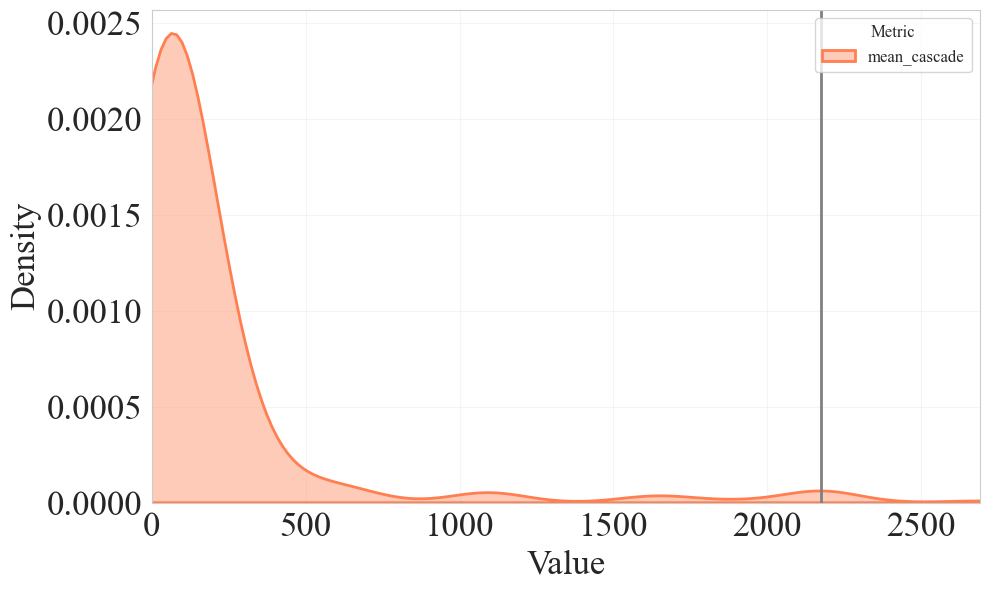

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
thr = df_result_no_zero['mean_cascade'].quantile(0.99)
# Setup figure
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot density for mean_cascade',
sns.kdeplot(
    data=df_result_no_zero,
    x='mean_cascade',
    fill=True,
    label='mean_cascade',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
# vertical line at the 90th percentile
ax.axvline(thr, color='grey', linestyle='-', linewidth=2)

# Labels and styling
plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * df_result_no_zero[['mean_cascade']].max().max())  # Extend x-axis limit
plt.tight_layout()
plt.show()


In [319]:
thr

2175.632

In [204]:
df_result_no_zero.groupby('category')[['mean_cascade', 'p_any_cascade']].mean().sort_values(by='mean_cascade', ascending=False).round(2)

,mean_cascade,p_any_cascade
category,,
Uncategorized,239.10,0.71
Network,231.02,0.70
IoT,136.60,1.00
IT,133.68,0.85
OT,56.20,0.60
Other,27.98,0.53


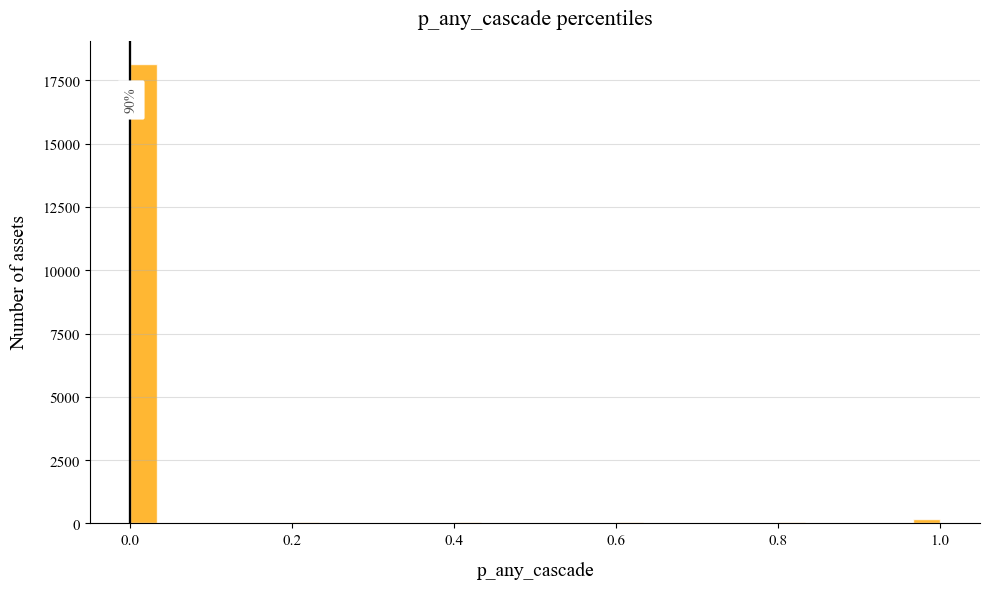

In [63]:
percentiles = [25, 50, 75, 90]
perc_values = np.percentile(df_results['p_any_cascade'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    df_results['p_any_cascade'],
    bins=30,
    edgecolor='white',
    color='orange', 
    alpha=0.8  
)
plt.grid(axis='y', linestyle='-', alpha=0.4)
y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(
        x=val,
        color='black',
        linestyle='-',
        linewidth=1.5,
        alpha=0.9
    )
    plt.text(
        val,
        y_max * 0.95,
        f"{p}%",
        rotation=90,
        color='black',
        fontsize=10,
        ha='center',
        va='top',
        backgroundcolor='white',
        alpha=0.7
    )

plt.title("p_any_cascade percentiles", fontsize=16, pad=12)
plt.xlabel("p_any_cascade", fontsize=14, labelpad=10)
plt.ylabel("Number of assets", fontsize=14, labelpad=10)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

- P_any_cascade (from Monte Carlo): probability that compromising j infects at least one other node.
- mean_cascade is the average number of other assets that end up compromised across all simulations when we “seed” a compromise at j.


**Asset Value**

V_ind: Independent value of asset

In [234]:
metric = 'mean_cascade'
min_val = 1_000.0
max_val = 250_000.0

vals = df_results[metric].values
v_min, v_max = vals.min(), vals.max()
denom = (v_max - v_min) or 1e-8
norm = (vals - v_min) / denom

df_results['V_ind'] = max_val + (1 - norm) * (min_val - max_val)  


In [235]:
df_results[['asset_id', metric, 'V_ind']].round(2).sort_values(by='V_ind', ascending=False)

,asset_id,mean_cascade,V_ind
7,a807012c-4456-4764-8e5a-4f52610429d5,2691.6,250000.00
6142,faea291e-2697-4323-9e1f-ad9248fa751b,2235.8,207833.93
8418,c1986d53-edbf-4bfb-9321-3f7b14408afa,2187.2,203337.94
1859,9b605f97-fcb2-4343-9b11-d2207d51c9a1,2178.8,202560.86
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,2174.0,202116.81
...,...,...,...
6327,e3fe4de9-1e28-4b93-9bfc-25635563a30f,0.0,1000.00
6328,af5814a8-0b67-4882-84a1-bfd06b34eda1,0.0,1000.00
6329,5c1e548e-68f5-45de-9c32-1dce3ddec824,0.0,1000.00
6330,88f1100c-3d51-4bc3-9d14-eb99e36357d7,0.0,1000.00


In [236]:
df_results_copy = df_results.copy(deep=True)

In [237]:
V_ind_map = {
    row['asset_id']: min_val + norm_val * (max_val - min_val)
    for row, norm_val in zip(df_results_copy.to_dict('records'), norm)}

raw_edges = pd.DataFrame([
    {'src': i, 'tgt': j, 'raw': m['p_ij']}
    for (i, j), m in p_ij.items()
])

# Compute scaling factors for each target to normalize alpha_ij
scale_map = {}
for tgt, grp in raw_edges.groupby('tgt'):
    total = grp['raw'].sum() or 1e-8
    scale_map[tgt] = 1.0 / total

# Apply scaling to get alpha_ij
raw_edges['alpha'] = raw_edges.apply(
    lambda x: x['raw'] * scale_map[x['tgt']], axis=1
)

# Build parent_map for quick access later
parent_map = {node: [] for node in V_ind_map}
for _, row in raw_edges.iterrows():
    parent_map[row['tgt']].append((row['src'], row['alpha']))



V_dep: Dependent value of asset

In [ ]:
V_dep = {}
for j in V_ind_map:
    if parent_map[j]:  # Only if j has parents (case 2)
        V_dep[j] = sum(alpha * V_ind_map[i] for i, alpha in parent_map[j])
    else:  # No parents (case 1)
        V_dep[j] = 0.0

# V_tot is the sum of independent and dependent values
V_tot = {j: V_ind_map[j] + V_dep[j] for j in V_ind_map}

df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_ind_map],
    'V_tot': [V_tot[j] for j in V_ind_map],
})

In [267]:
df_vals.sort_values(by='V_tot', ascending=True).head(10)

,asset_id,V_ind,V_dep,V_tot,EF
2690,a8867723-fc68-4744-8f11-6b748db87a79,1000.0,0.0,1000.0,1.0
2591,0628ce97-acf7-4d59-b268-24f55960ab47,1000.0,0.0,1000.0,1.0
963,2f46520b-45f9-4345-adae-9f12eaa3c12b,1000.0,0.0,1000.0,1.0
8733,b00f4e8f-8e3f-435b-8a9e-5060d834cc89,1000.0,0.0,1000.0,1.0
3958,ccaaea3b-8a9e-4f1e-ad79-cddd16908604,1000.0,0.0,1000.0,1.0
10355,119532c5-e325-4d92-b43b-4d10c6a425e8,1000.0,0.0,1000.0,1.0
2572,d0b09984-2762-4182-9b7e-ac174f23639d,1000.0,0.0,1000.0,1.0
10582,fb0dd047-316b-4ab3-88ec-5788d05f4e43,1000.0,0.0,1000.0,1.0
2564,a8487f0b-507d-4bd7-aefb-f35929b1fd4e,1000.0,0.0,1000.0,1.0
2544,c7507119-299c-424c-a2a0-87df88b7dfd9,1000.0,0.0,1000.0,1.0


**Exposure Factor**

Based on αij 

In [240]:
EF = {}
for j in V_ind_map:
    if not parent_map[j]:  # Case (1)
        EF[j] = 1.0
    else:  # Case (2)
        EF[j] = V_dep[j] / V_tot[j] if V_tot[j] > 0 else 0.0

In [241]:
df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_ind_map],
    'V_tot': [V_tot[j] for j in V_ind_map],
    'EF': [EF[j] for j in V_ind_map],
})
df_vals.sort_values(by='EF', ascending=False).head(10)

,asset_id,V_ind,V_dep,V_tot,EF
592,09dd0918-55c5-4d7e-93d6-974a8f0a7f24,1000.0,0.0,1000.0,1.0
2544,c7507119-299c-424c-a2a0-87df88b7dfd9,1000.0,0.0,1000.0,1.0
2791,80d8d4ba-8575-4cc8-909f-7d4ea31a303a,1000.0,0.0,1000.0,1.0
1912,cae7ee8e-8a7a-4d78-ad05-99dd5224075a,1000.0,0.0,1000.0,1.0
3280,5d1e901a-ce48-4905-9dbb-919973dfb5e9,1000.0,0.0,1000.0,1.0
705,2c47541c-0ed0-4636-8999-41374f50817d,1000.0,0.0,1000.0,1.0
5723,199267fd-1116-4227-8c2c-927a987621bb,1000.0,0.0,1000.0,1.0
4390,8d20e736-8e15-43f1-8b86-82f762497193,1000.0,0.0,1000.0,1.0
707,4980bcef-527b-4677-8910-92a311854631,1000.0,0.0,1000.0,1.0
2169,bbcd7966-c4f7-4408-b909-5a3ba4086281,1000.0,0.0,1000.0,1.0


**SLE & ALE**

In [242]:
df_final = df_vals.copy()
df_final['P_base'] = df_final['asset_id'].map(P_base)  
df_final['SLE'] = df_final['V_tot'] * df_vals['EF']   # single‐loss expectancy
df_final['ALE'] = df_final['SLE']   * df_final['P_base']  # annual loss expectancy
df_final = df_final.fillna(0)    

In [ ]:
df_final.sort_values(by='ALE', ascending=False).round(2)
#df_final.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/VLAN_120_final_results.csv', index=False)

In [244]:
df_final[['V_ind', 'V_dep', 'V_tot', 'EF', 'P_base', 'SLE', 'ALE']].describe().style.format({"SLE": "{:.2f}", "ALE": "{:.2f}", "V_tot": "{:.2f}", "EF": "{:.2f}", "P_base": "{:.2f}", "V_dep": "{:.2f}", "V_ind": "{:.2f}"})

,V_ind,V_dep,V_tot,EF,P_base,SLE,ALE
count,18529.00,18529.00,18529.00,18529.00,18529.00,18529.00,18529.00
mean,1345.96,231367.37,232713.33,0.99,0.19,231375.04,36838.22
std,5727.59,60423.65,59873.82,0.05,0.15,60394.37,12295.52
min,1000.00,0.00,1000.00,0.02,0.00,1000.00,0.00
25%,1000.00,250000.00,251000.00,1.00,0.15,250000.00,36298.98
50%,1000.00,250000.00,251000.00,1.00,0.15,250000.00,36298.98
75%,1000.00,250000.00,251000.00,1.00,0.15,250000.00,36680.01
max,250000.00,250000.00,452560.86,1.00,1.00,250000.00,137370.79


In [245]:
df_final['ALE'].sum()

682575319.7435397

In [246]:
df_final['V_tot'].sum()

4311945262.538083

In [247]:
assets_with_zero_ale = df_final[df_final['ALE'] == 0.0]
assets_with_zero_ale

,asset_id,V_ind,V_dep,V_tot,EF,P_base,SLE,ALE
82,1607feaf-169a-49f5-b197-e3132d3cd360,1037.004012,0.0,1037.004012,1.0,0.0,1037.004012,0.0
199,9cc6d232-b406-4055-95a5-7f1ab95dba36,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0
367,dadb85c7-f504-46cc-90da-32cf598fa061,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0
517,2f3e2644-9688-4490-837b-b2f9e3f39eab,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0
567,0f4d6182-b1a0-401a-8014-af363f4ec852,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0
...,...,...,...,...,...,...,...,...
18360,f8787073-ca3e-4036-9d28-0d2815e6d8e2,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0
18454,18ad5c0e-ffa0-490c-817c-6a47ba8d95e8,6069.549710,0.0,6069.549710,1.0,0.0,6069.549710,0.0
18459,2ced8261-ed44-41a2-bb48-ea974760a691,1018.502006,0.0,1018.502006,1.0,0.0,1018.502006,0.0
18519,3a170cf2-e15a-4b86-b5cf-f06bd1fdb81e,1000.000000,0.0,1000.000000,1.0,0.0,1000.000000,0.0


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


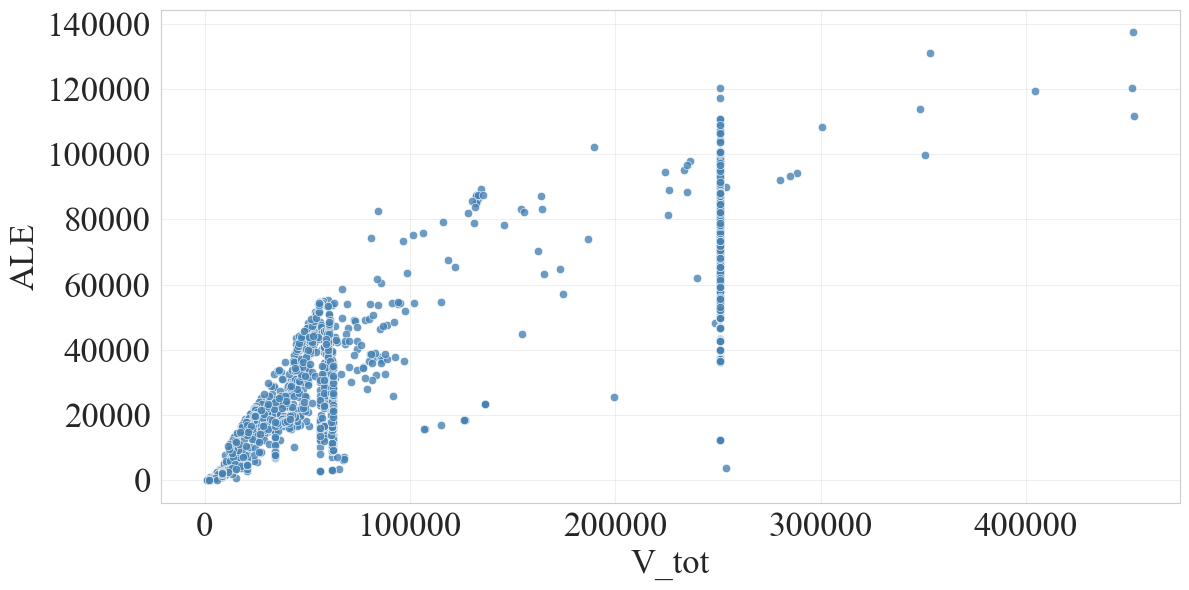

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final,
    x="V_tot",
    y="ALE",
    alpha=0.8,
    color="steelblue"
)

plt.xlabel("V_tot", fontsize=25)
plt.ylabel("ALE",  fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True, linestyle="-", alpha=0.3)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


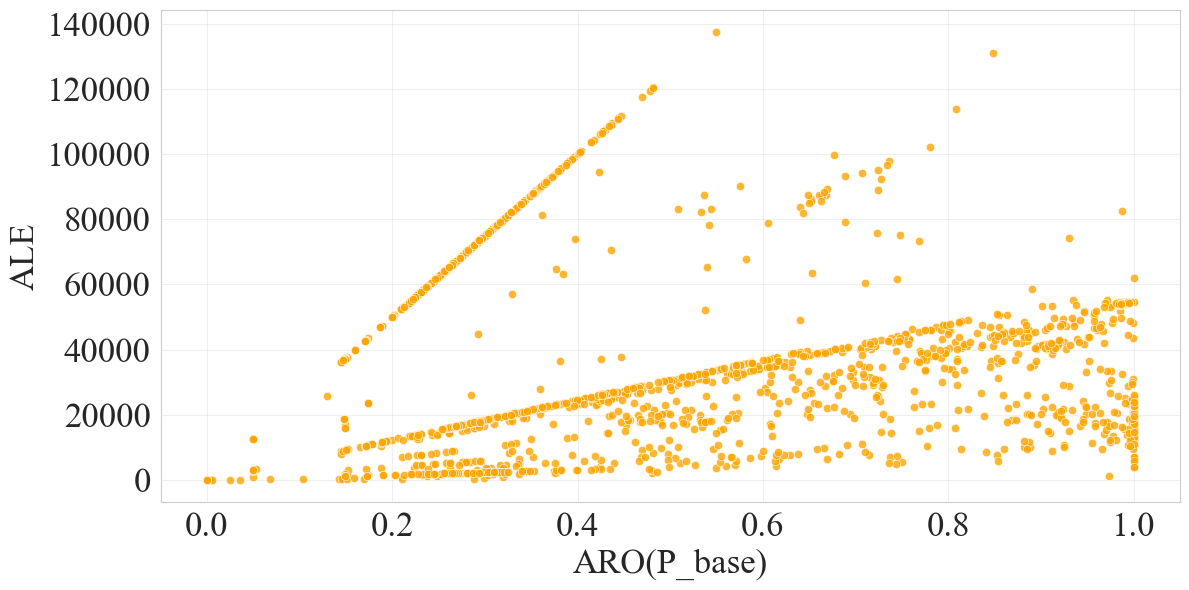

In [249]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final,
    x="P_base",
    y="ALE",
    alpha=0.8,
    color="orange"
)

plt.xlabel("ARO(P_base)", fontsize=25)
plt.ylabel("ALE",  fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True, linestyle="-", alpha=0.3)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


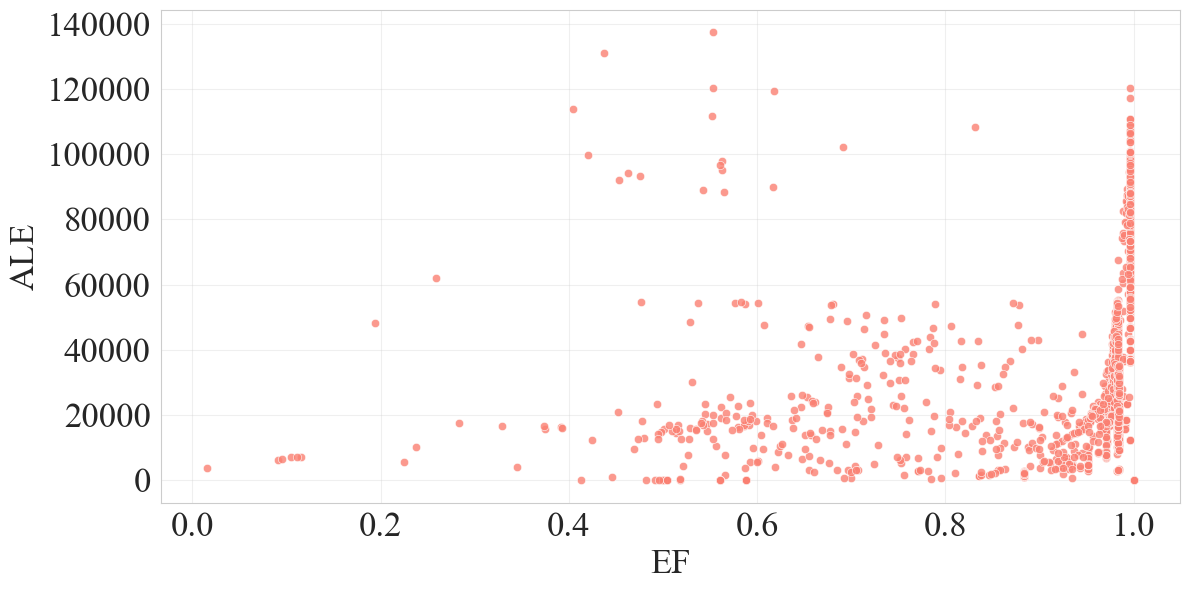

In [250]:
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='EF', 
    y='ALE',
    alpha=0.8,
    color='salmon'
)

plt.xlabel("EF", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


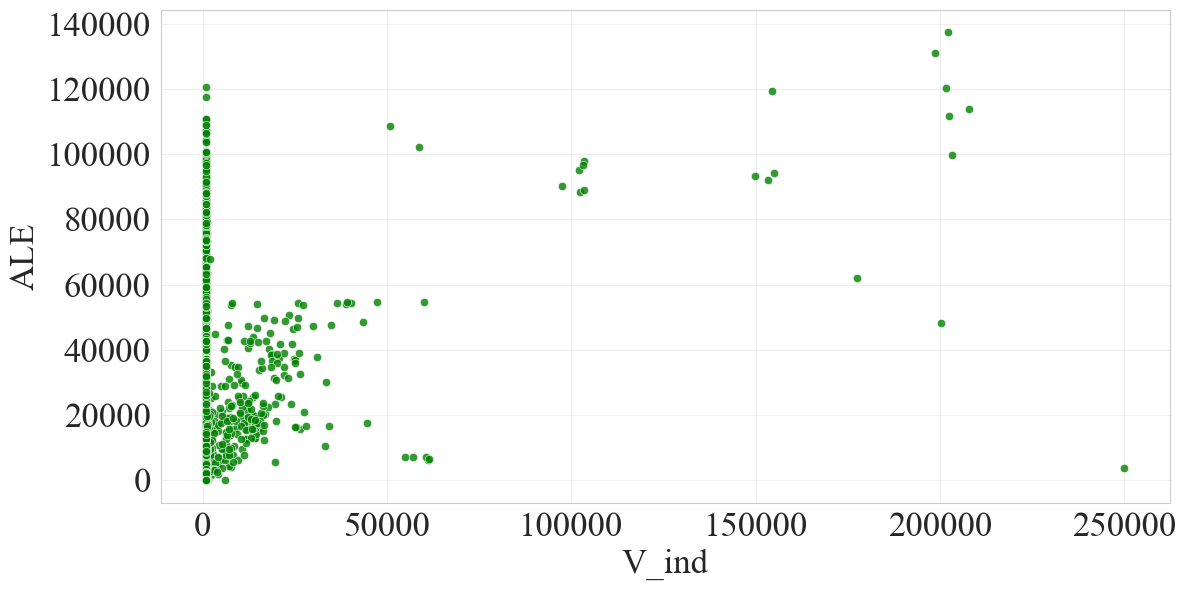

In [258]:
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_ind', 
    y='ALE',
    alpha=0.8,
    color='green'
)

plt.xlabel("V_ind", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


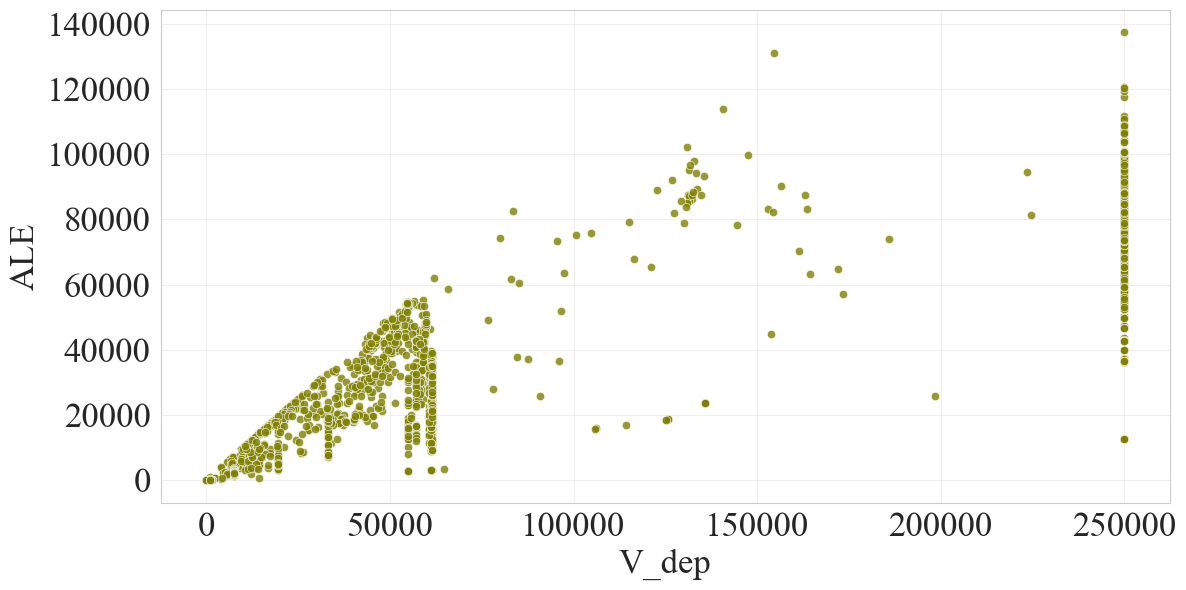

In [264]:
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_dep', 
    y='ALE',
    alpha=0.8,
    color='olive'
)

plt.xlabel("V_dep", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


In [284]:
cols_df1 = vlan_120[['id', 'computed_value']]
cols_df2 = df_final[['asset_id', 'ALE']]

test_df = cols_df2.merge(cols_df1, left_on='asset_id', right_on='id', how='left')
test_df[['id', 'computed_value', 'ALE']].sort_values(by='ALE', ascending=False)


,id,computed_value,ALE
4183,b04be2be-f8fc-4ab6-b2f8-e0dbe89b8d3a,0.0,137370.787530
29,8349d991-b230-4ae1-a69e-bf83a8a6ce4a,0.0,131173.929654
757,9a246b7d-7563-4190-ad69-b9aed5186abd,0.0,120469.734578
11193,7ab0ee85-1a30-4e62-a074-23ffb3b60628,0.0,120287.843643
3149,6e00077a-c5f7-43f0-9ec3-0a1fcccd4a08,0.0,119424.081380
...,...,...,...
82,NaN,NaN,0.000000
517,2f3e2644-9688-4490-837b-b2f9e3f39eab,0.0,0.000000
2316,1a5b71de-af94-4cd5-b989-af49f707fe19,0.0,0.000000
4213,e7952d80-9da7-412d-8362-74db2847e93a,0.0,0.000000


In [323]:
test_df[test_df['computed_value'] == 0.0]


,asset_id,ALE,id,computed_value
8,6884acae-96f8-493c-bc46-2bc6a6bd2b85,6.175876e+04,6884acae-96f8-493c-bc46-2bc6a6bd2b85,0.0
9,10f324c8-b31b-44d0-bbd9-0cd74b2618b9,4.817087e+04,10f324c8-b31b-44d0-bbd9-0cd74b2618b9,0.0
13,b06356cc-796a-4050-a9d9-1b47899e1d39,3.452781e+04,b06356cc-796a-4050-a9d9-1b47899e1d39,0.0
14,246a1461-0320-4626-bfbf-91e16c495ea7,3.497134e+04,246a1461-0320-4626-bfbf-91e16c495ea7,0.0
15,8065993e-28a9-41ef-8326-3755dfb5aa93,3.483797e+04,8065993e-28a9-41ef-8326-3755dfb5aa93,0.0
...,...,...,...,...
18490,fce18b11-ea95-423e-b723-d7b7ac7494de,1.789488e+04,fce18b11-ea95-423e-b723-d7b7ac7494de,0.0
18491,fc47610f-0431-42ae-a814-57d37746e34f,1.742864e+04,fc47610f-0431-42ae-a814-57d37746e34f,0.0
18496,4fb52283-13e0-4402-8a14-3994b1f82fd5,1.927032e+04,4fb52283-13e0-4402-8a14-3994b1f82fd5,0.0
18497,e047b8a2-4508-42e7-9b5b-d92f487b1232,3.149775e+04,e047b8a2-4508-42e7-9b5b-d92f487b1232,0.0


In [324]:
test_df[test_df['ALE'] == 0.0]

,asset_id,ALE,id,computed_value
82,1607feaf-169a-49f5-b197-e3132d3cd360,0.0,NaN,NaN
199,9cc6d232-b406-4055-95a5-7f1ab95dba36,0.0,9cc6d232-b406-4055-95a5-7f1ab95dba36,0.0
367,dadb85c7-f504-46cc-90da-32cf598fa061,0.0,dadb85c7-f504-46cc-90da-32cf598fa061,0.0
517,2f3e2644-9688-4490-837b-b2f9e3f39eab,0.0,2f3e2644-9688-4490-837b-b2f9e3f39eab,0.0
567,0f4d6182-b1a0-401a-8014-af363f4ec852,0.0,0f4d6182-b1a0-401a-8014-af363f4ec852,0.0
...,...,...,...,...
18360,f8787073-ca3e-4036-9d28-0d2815e6d8e2,0.0,f8787073-ca3e-4036-9d28-0d2815e6d8e2,0.0
18454,18ad5c0e-ffa0-490c-817c-6a47ba8d95e8,0.0,NaN,NaN
18459,2ced8261-ed44-41a2-bb48-ea974760a691,0.0,NaN,NaN
18519,3a170cf2-e15a-4b86-b5cf-f06bd1fdb81e,0.0,NaN,NaN


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

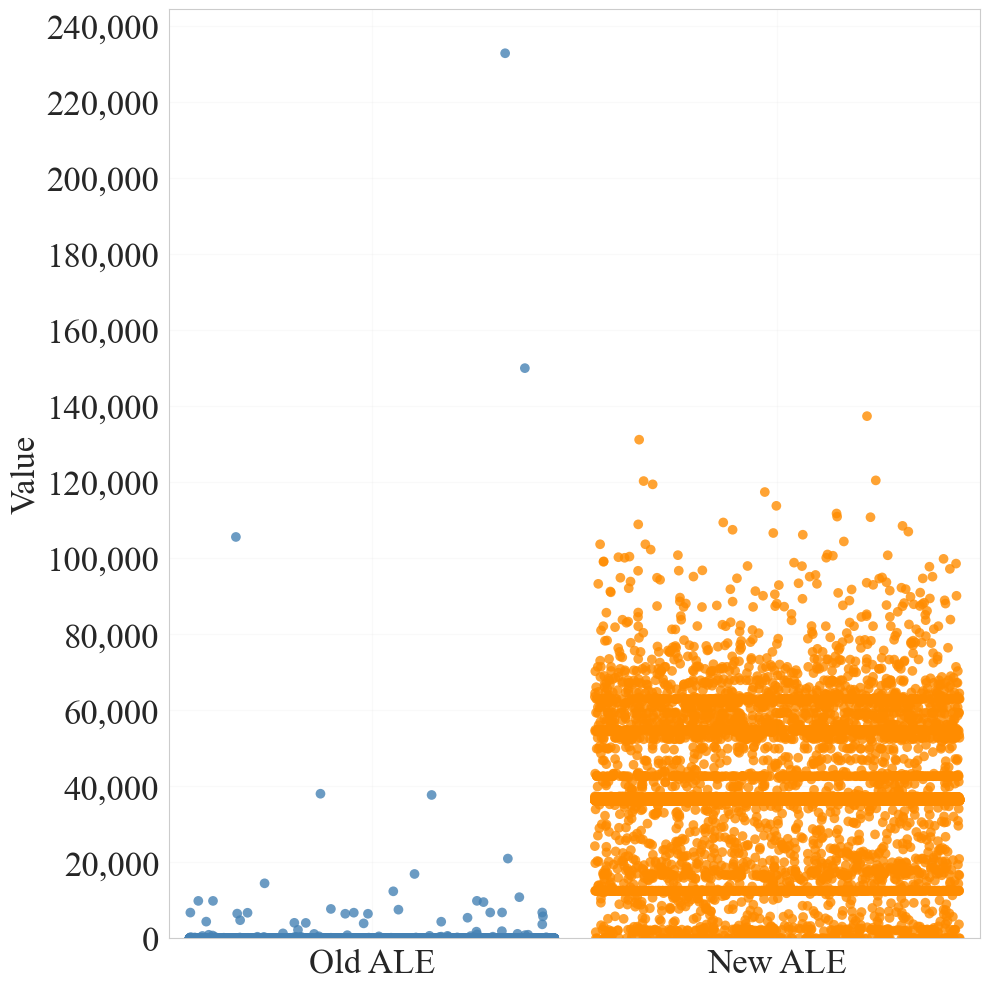

In [ ]:
import matplotlib.ticker as ticker

melted = test_df.melt(
    value_vars=['computed_value','ALE'],
    var_name='Metric',
    value_name='Value'
)
melted['Metric'] = melted['Metric'].replace({
    'computed_value': 'Old ALE',
    'ALE':             'New ALE'
})

plt.figure(figsize=(10,10))

ax = sns.stripplot(
    data=melted,
    x='Metric',
    y='Value',
    jitter=0.45,                   
    size=7,
    edgecolor=['navy', 'darkorange'],
    alpha=0.8,
    palette=['steelblue','darkorange']
)

ymax = melted['Value'].max()
ax.set_ylim(0, ymax * 1.05)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xlabel("", fontsize=25)
ax.set_ylabel("Value", fontsize=25)
ax.tick_params(labelsize=25)
plt.grid(True, which='major', linestyle='-', alpha=0.1)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


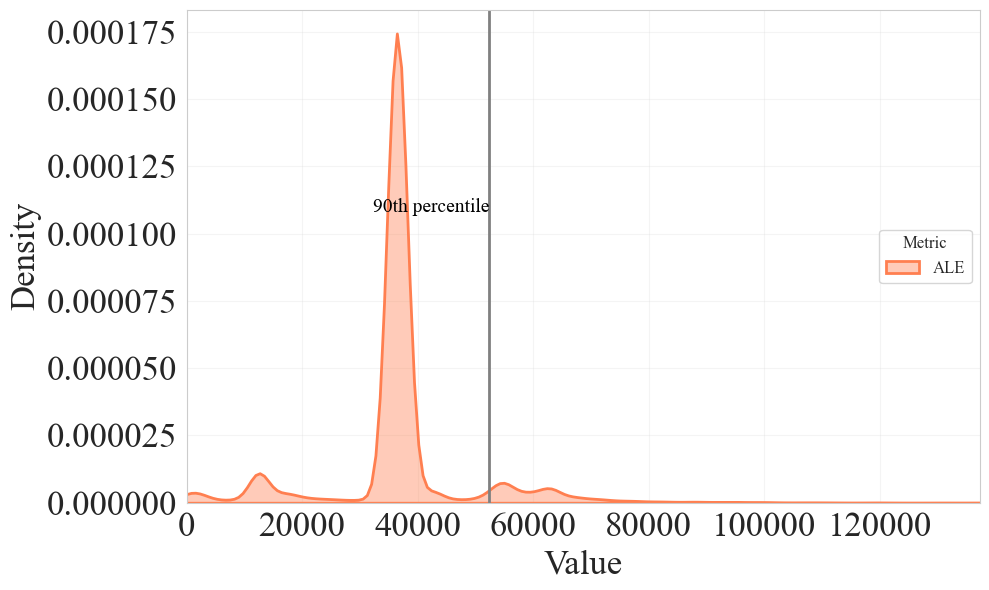

In [ ]:
thr = test_df['ALE'].quantile(0.90)

plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.kdeplot(
    data=test_df,
    x='ALE',
    fill=True,
    label='ALE',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr, color='grey', linestyle='-', linewidth=2)
ax.text(thr, ax.get_ylim()[1]*0.6, '90th percentile', 
        ha='right', va='center', fontsize=14, color='black')
plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * test_df[['ALE']].max().max())  
plt.tight_layout()
plt.show()


In [333]:
thr = test_df['ALE'].quantile(0.90)
thr

52359.07464596279

In [ ]:
df_final = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/VLAN_120_final_results.csv', delimiter=',')

,ALE,V_tot,EF,P_base
ALE,1.000,0.437,0.201,0.127
V_tot,0.437,1.000,0.478,-0.673
EF,0.201,0.478,1.000,-0.539
P_base,0.127,-0.673,-0.539,1.000


In [5]:
df = df_final.copy()

In [14]:
df['log_AV'] = np.log(df['V_tot'])
df['log_EF'] = np.log(df['EF'])
df['log_ARO'] = np.log(df['P_base'])
df['log_ALE'] = np.log(df['ALE'])

cols_1 = ['log_ALE', 'log_AV', 'log_EF', 'log_ARO']
subset_1 = df[cols_1]
corr_1 = subset_1.corr()
corr_1.round(3)

/Users/ngantram/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_ALE,log_AV,log_EF,log_ARO
log_ALE,1.000,0.623,0.333,0.385
log_AV,0.623,1.000,0.343,-0.474
log_EF,0.333,0.343,1.000,-0.263
log_ARO,0.385,-0.474,-0.263,1.000
